# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

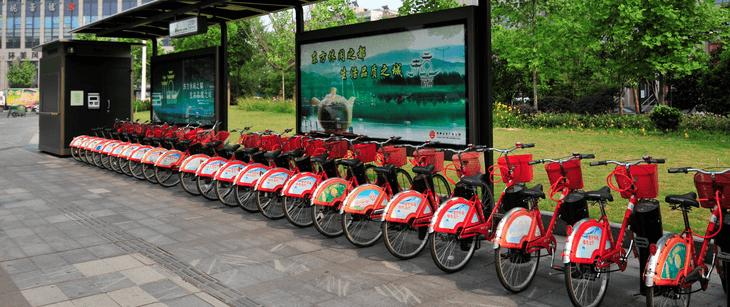

#INITIALIZING DATA

In [107]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [108]:
# URL for the Data stored in CSV
url = 'https://drive.google.com/uc?export=download&id=1G6V1nWS4BKMzvYIZZ7sWUTSuJAs1WLxI'

# Importing dataset to create a dataframe
df = pd.read_csv(url,encoding = 'latin',parse_dates=['Date'])

In [109]:
#Dataframe Shape
print('Shape of the dataset: ', df.shape)

Shape of the dataset:  (8760, 14)


In [110]:
#First 5 rows in the dataset
df.head(200)[50:60]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
50,2017-03-12,228,2,3.3,79,1.4,830,0.0,0.00,0.0,0.0,Winter,No Holiday,Yes
51,2017-03-12,117,3,3.4,71,1.6,1011,-1.3,0.00,0.5,0.0,Winter,No Holiday,Yes
52,2017-03-12,76,4,3.5,73,1.0,1060,-0.8,0.00,0.0,0.0,Winter,No Holiday,Yes
53,2017-03-12,32,5,3.9,75,1.9,914,-0.1,0.00,0.0,0.0,Winter,No Holiday,Yes
54,2017-03-12,13,6,3.4,86,2.5,278,1.2,0.00,1.0,0.0,Winter,No Holiday,Yes
55,2017-03-12,22,7,3.1,91,1.2,129,1.7,0.00,0.0,0.0,Winter,No Holiday,Yes
56,2017-03-12,85,8,3.2,92,1.8,244,2.0,0.00,0.0,0.0,Winter,No Holiday,Yes
57,2017-03-12,152,9,3.5,91,1.8,231,2.1,0.02,2.5,0.0,Winter,No Holiday,Yes
58,2017-03-12,200,10,4.4,89,2.2,257,2.7,0.24,0.0,0.0,Winter,No Holiday,Yes
59,2017-03-12,273,11,5.1,87,1.4,321,3.1,0.25,0.0,0.0,Winter,No Holiday,Yes


In [111]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [112]:
#Data Description of Numerical Columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [113]:
#Checking for missing values in the dataframe
print('Missing value count with respect to each column:')
df.isna().sum()

Missing value count with respect to each column:


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Our dataset does not contain any missing values :)

In [114]:
#Checking for duplicate rows in the dataframe
print(len(df[df.duplicated()]))

0


Our dataset contains only unique rows :)

#EXPLORATORY DATA ANALYSIS AND FEATURE MANIPULATION

Let's first analyse our dependant variable ('Rented Bike Count')

In [115]:
dep_var = df['Rented Bike Count']

In [116]:
#Calculating Skewness of the dependent Variable
print(f'Skewness of original data : ', dep_var.skew())
print(f'Skewness after transformation : ', np.sqrt(dep_var).skew())

Skewness of original data :  1.1534281773679014
Skewness after transformation :  0.237362090985412


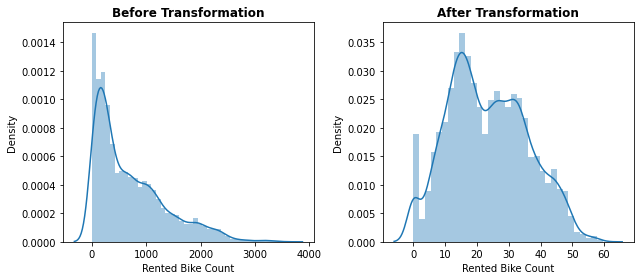

In [117]:
#Plotting distribution before and after Transformation
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(df['Rented Bike Count']).set_title('Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['Rented Bike Count'])).set_title('After Transformation',weight='bold')
plt.tight_layout();

Let's now analyse our Independant Variables

Exploring at Numerical Features

In [118]:
#Getting Numerical Columns from the data
numeric_features = df.describe().columns

numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

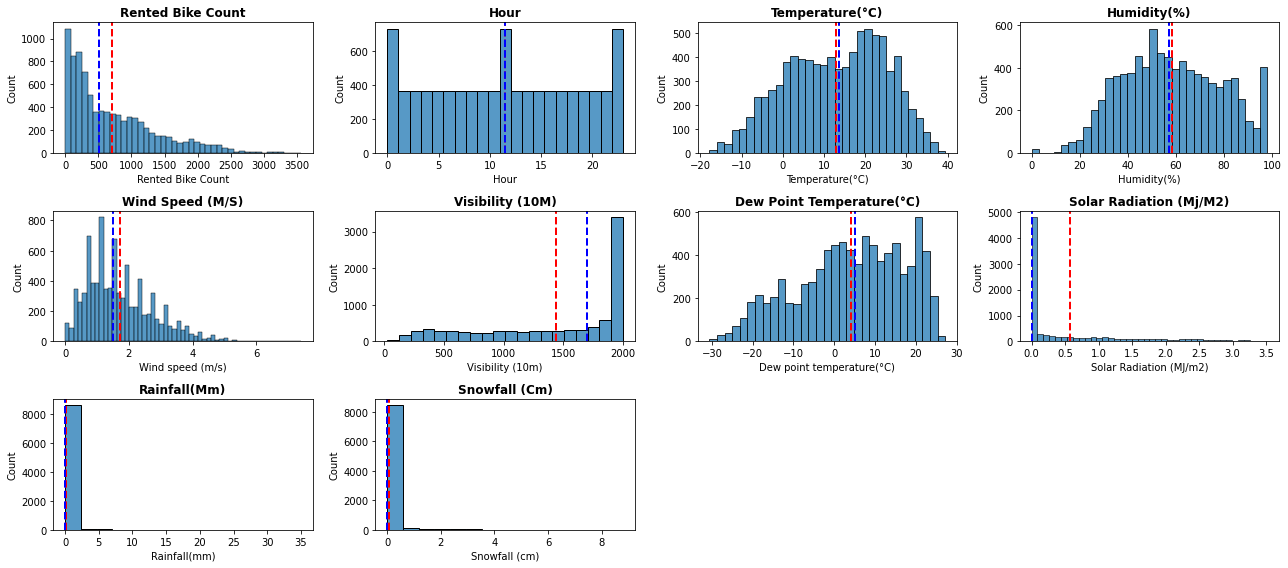

In [119]:
plt.figure(figsize=(18,8))
for n,column in enumerate(numeric_features):
  feature = df[column]
  ax=plt.subplot(3, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

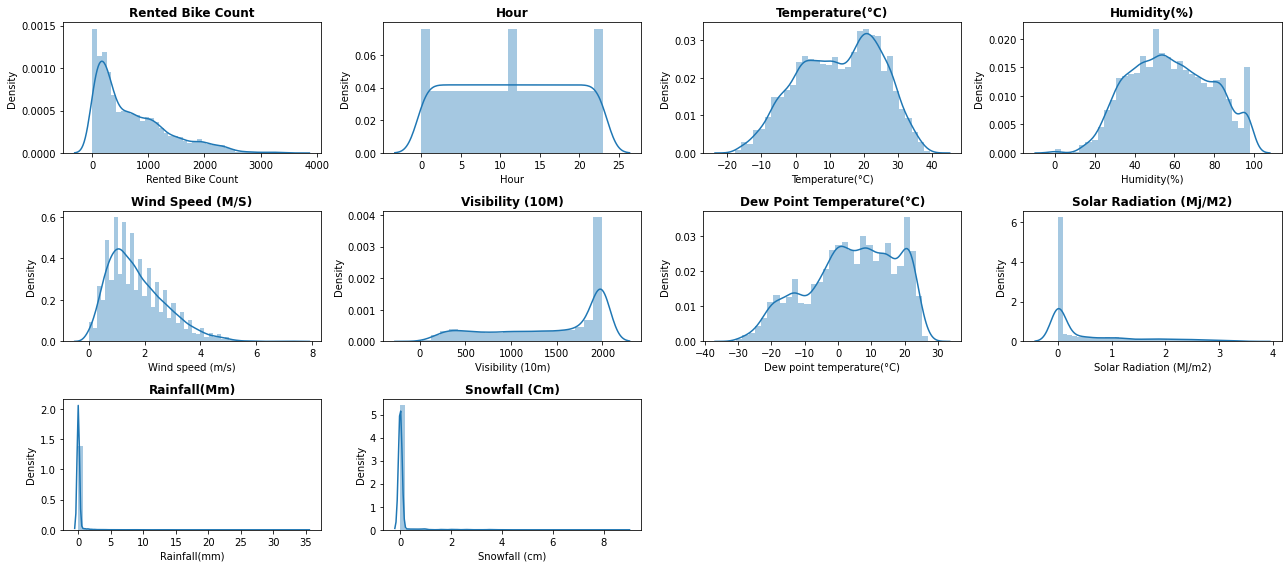

In [120]:
# Visualizing the distributions.
plt.figure(figsize=(18,8))
for n,column in enumerate(numeric_features):
  plt.subplot(3, 4, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Exploring Catagorical Features

In [121]:
# Extracting new features from Data and Hour column
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day_of_the_Month'] = df['Date'].apply(lambda x : x.month)
df['Is_Weekend'] = df['Date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0 )
df['Time_of_the_Day'] = df['Hour'].apply(lambda x: 'night' if 21<=x<=23 or 0<=x<=5 else ('morning' if 5<=x<=12 else ('afternoon' if 12<=x<=17 else 'evening')))


# Dropping the Date column
df.drop(columns=['Date'], inplace = True)

In [122]:
#Getting Catagorical Columns from the data
categorical_features = [i for i in df.columns if i not in df.describe().columns]
categorical_features

['Seasons', 'Holiday', 'Functioning Day', 'Time_of_the_Day']

In [123]:

[print(f'{i}: \n {df[i].value_counts()} \n') for i in categorical_features]

Seasons: 
 Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

Holiday: 
 No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Functioning Day: 
 Yes    8465
No      295
Name: Functioning Day, dtype: int64 

Time_of_the_Day: 
 night        3285
morning      2555
afternoon    1825
evening      1095
Name: Time_of_the_Day, dtype: int64 



[None, None, None, None]

We will perform Label Encoding on the features 'Holiday', 'Functioning Day', 'Time_of_the_Day' and One Hot Encoding on the 'Seasons' feature

In [124]:
# Defining a label encoder based on above data
encoder = {'Holiday':{'Holiday':1, 'No Holiday':0},'Functioning Day':{'Yes':1, 'No': 0},
          'Time_of_the_Day': {'night':0, 'morning':1, 'afternoon':2, 'evening':3}}

# Label Encoding
df = df.replace(encoder)

# One Hot Encoding
df = pd.get_dummies(df, columns=["Seasons"], prefix='', prefix_sep='')

Our Dataframe will look like this:

In [125]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Day_of_the_Month,Is_Weekend,Time_of_the_Day,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,1,0,0,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,1,0,0,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,1,0,0,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,1,0,0,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,1,0,0,0,0,0,1


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Functioning Day            8760 non-null   int64  
 12  Month                      8760 non-null   int64  
 13  Day_of_the_Month           8760 non-null   int64

Relationship between our Target Variable ('Rented Bike Count') with other features

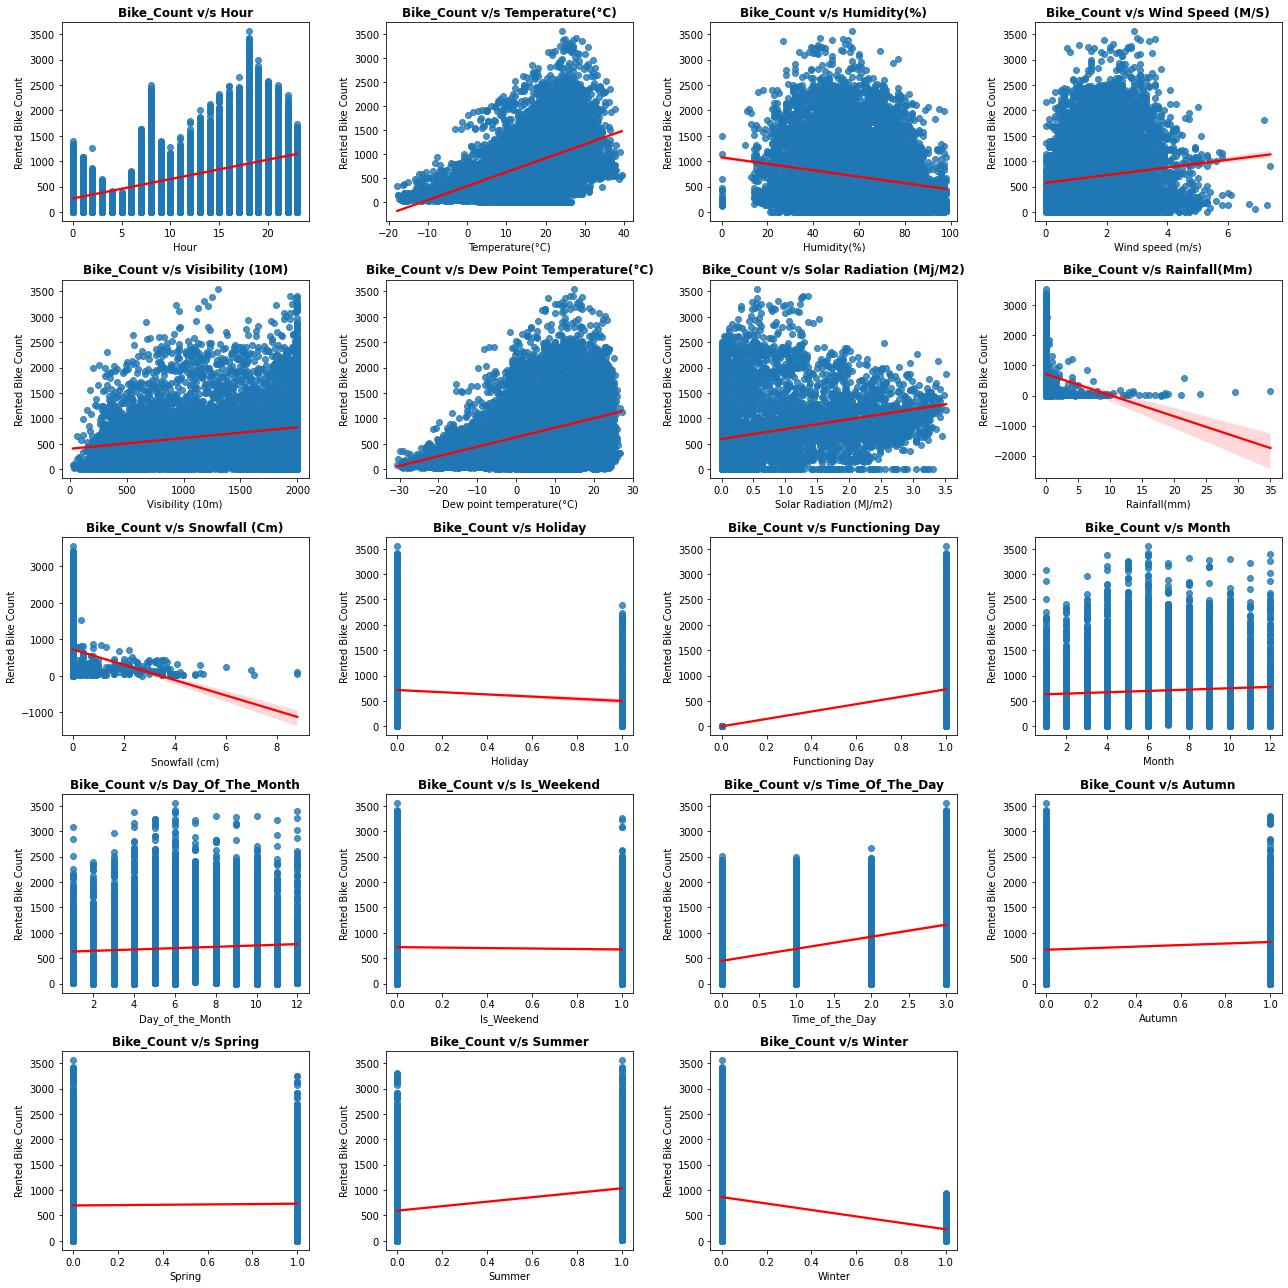

In [127]:
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count']]


plt.figure(figsize=(18,18))
for n,column in enumerate(independent_variables):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = df, x = column, y ='Rented Bike Count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

Checking for multicollinearity between features

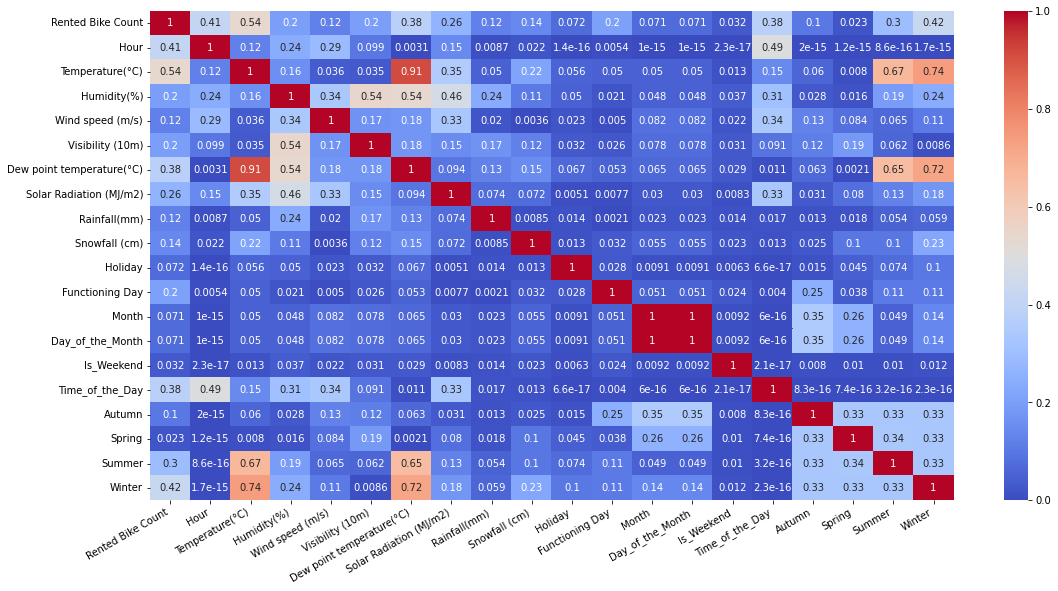

In [128]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

We can check VIF for different features and get rid of some features to tackle multicollinearity

In [129]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

In [130]:
calc_vif(df[independent_variables])

,variables,VIF
0,Day_of_the_Month,inf
1,Month,inf
2,Dew point temperature(°C),117.944780
3,Summer,116.115550
4,Spring,111.556623
5,Autumn,110.890030
6,Winter,106.469597
7,Temperature(°C),90.490049
8,Humidity(%),20.579244
9,Solar Radiation (MJ/m2),2.054140


Removing Features with high VIF

In [152]:
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Functioning Day','Day_of_the_Month','Summer','Winter','Autumn','Spring']]
calc_vif(df[independent_variables])

,variables,VIF
0,Humidity(%),6.184777
1,Visibility (10m),5.425128
2,Hour,4.945035
3,Wind speed (m/s),4.774366
4,Month,4.591661
5,Temperature(°C),3.260021
6,Time_of_the_Day,3.159291
7,Solar Radiation (MJ/m2),2.342116
8,Is_Weekend,1.399900
9,Snowfall (cm),1.127084


Let's update our dataset with optimal features and start modelling

In [153]:
data = df[independent_variables + ['Rented Bike Count']]
data.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Month,Is_Weekend,Time_of_the_Day,Rented Bike Count
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,254
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,204
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,173
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,107
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,78


Correlation Heatmap for updated dataset

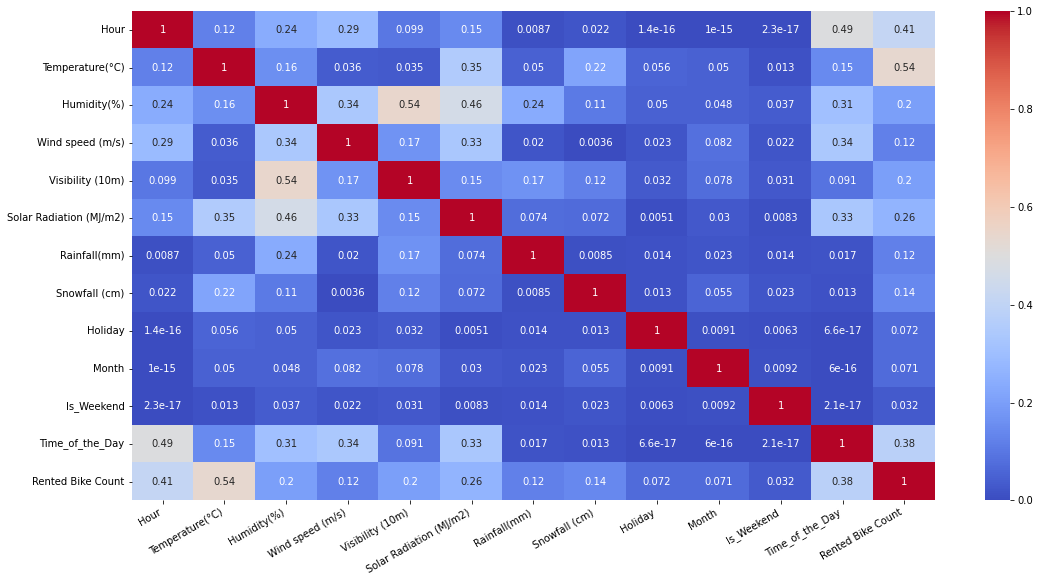

In [154]:

plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(data.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

Checking Relationship between Target Variable ('Rented Bike Count') and Independant Features from the updated dataset

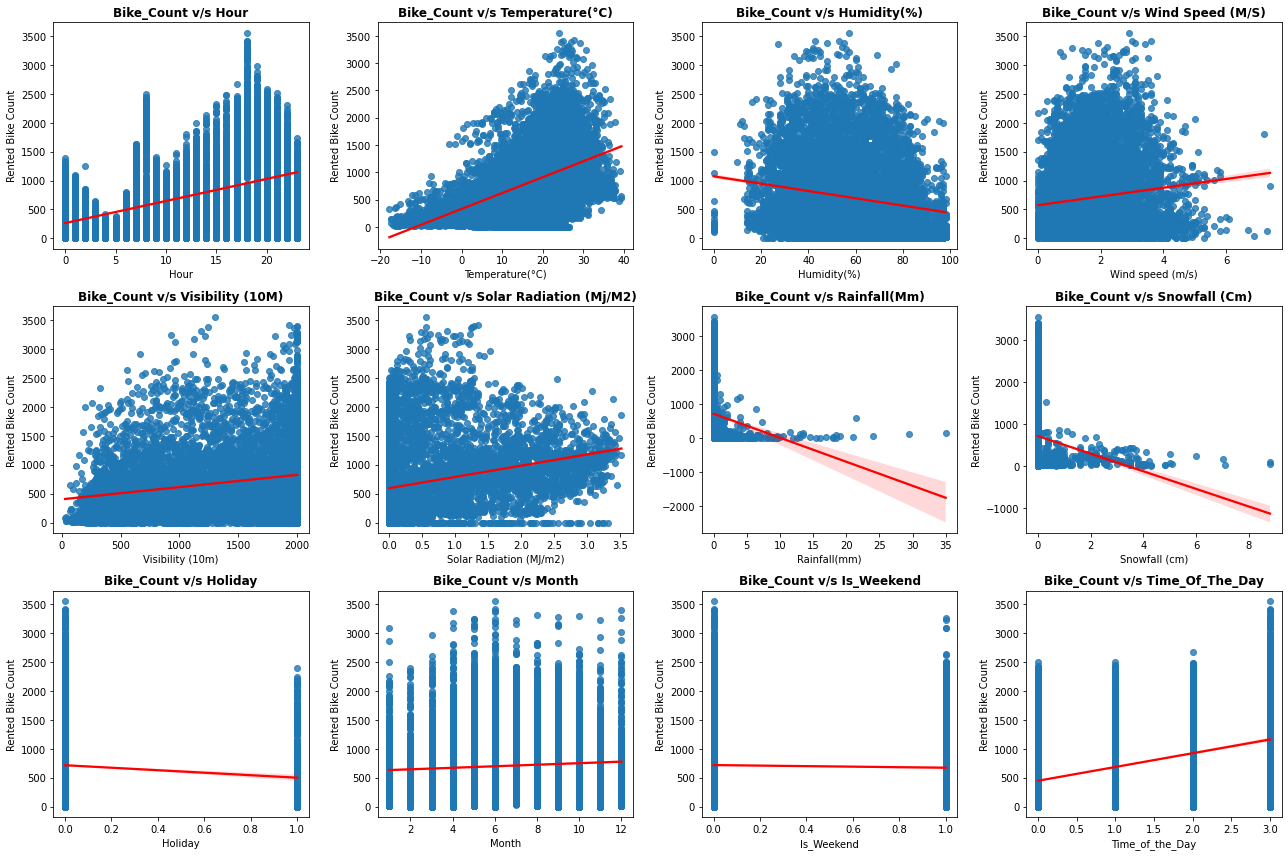

In [155]:
#Making a list of independant variables 
ind_var = independent_variables = [i for i in data.columns if i not in ['Rented Bike Count']]

#Plotting Linearity
plt.figure(figsize=(18,12))
for n,column in enumerate(independent_variables):
  plt.subplot(3, 4, n+1)
  sns.regplot(data = data, x = column, y ='Rented Bike Count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()